# Pymaceuticals Inc.
---

### Analysis

- 248 mice in total were analyzed, with a breakdown of 51% male and 49% female.

- Capoline and Ramocane had the smallest tumor volume mean, thus were the most effective. 

- The average tumor size and weight of the mice may be positively correlated.

- Ceftamin had the most varied effectiveness out of the top 4 regimens.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results,mouse_metadata, on="Mouse ID", how='left')

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(merged_data["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_id = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_data.loc[merged_data['Mouse ID'].isin(dup_mice_id),:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data[merged_data['Mouse ID'].isin(dup_mice_id)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_vol_mean = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"].rename("Mean Tumor Volume")
tumor_vol_median= clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"].rename("Median Tumor Volume")
tumor_vol_var= clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"].rename("Tumor Volume Variance")
tumor_vol_std= clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"].rename("Tumor Volume Std. Dev.")
tumor_vol_sem= clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"].rename("Tumor Volume Std. Err.")
drug_regimen_summ_df = pd.concat([tumor_vol_mean,tumor_vol_median,tumor_vol_var,tumor_vol_std,tumor_vol_sem],axis=1)
drug_regimen_summ_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_vol_stats = clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]}).style.set_properties(**{'text-align': 'right'})
tumor_vol_stats

## Bar and Pie Charts

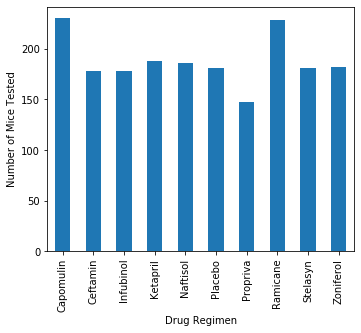

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_per_drug = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"].rename("Number of Mice Tested")
mice_tested_plot = mice_per_drug.plot(kind="bar", figsize=(5.5,4.5))
mice_tested_plot.set_ylabel("Number of Mice Tested")
plt.show()

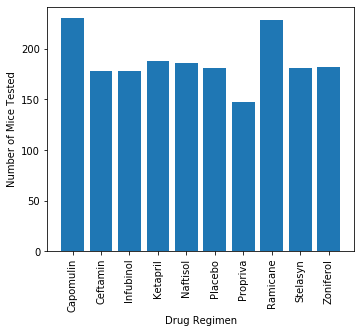

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
figure = plt.figure(figsize=(5.5,4.5))
plt.bar(mice_per_drug.index, mice_per_drug.values, align="center")
plt.xticks(mice_per_drug.index,rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()
figure.tight_layout()

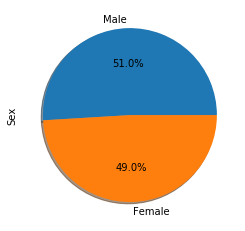

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels = clean_df['Sex'].unique()
pie_df = clean_df['Sex'].value_counts()
xlabel = clean_df['Sex'].unique()
figure1 = pie_df.plot(kind='pie', y=labels, autopct="%1.1f%%", shadow=True)
figure1.set_ylabel('Sex')
plt.show()

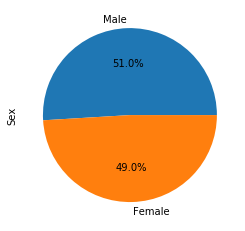

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_df,autopct='%1.1f%%',labels=['Male','Female'])
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tumor_df = clean_df.groupby(["Drug Regimen","Mouse ID"]).max()["Timepoint"]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_df = pd.merge(last_tumor_df, clean_df[["Mouse ID","Drug Regimen","Sex","Age_months","Weight (g)","Timepoint","Tumor Volume (mm3)","Metastatic Sites"]], how="left", on=["Drug Regimen","Mouse ID","Timepoint"])
last_tumor_df

,Drug Regimen,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,Capomulin,b128,45,Female,9,22,38.982878,2
1,Capomulin,b742,45,Male,7,21,38.939633,0
2,Capomulin,f966,20,Male,16,17,30.485985,0
3,Capomulin,g288,45,Male,3,19,37.074024,1
4,Capomulin,g316,45,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
243,Zoniferol,q633,45,Male,12,25,70.827796,2
244,Zoniferol,s337,45,Male,14,27,62.109651,4
245,Zoniferol,w140,5,Female,19,30,47.717952,0
246,Zoniferol,w575,45,Female,16,28,68.401286,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments =  ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]

for treatment in treatments:
    tumor_vol = last_tumor_df.loc[last_tumor_df['Drug Regimen']== treatment,'Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25,0.50,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    for i in tumor_vol:
        if i < lower_bound or i > upper_bound:
            print('For '+ treatment + ', the potential outlier is ' + str(i))
        
    tumor_vol_list.append(tumor_vol)

For Infubinol, the potential outlier is 36.321345799999996


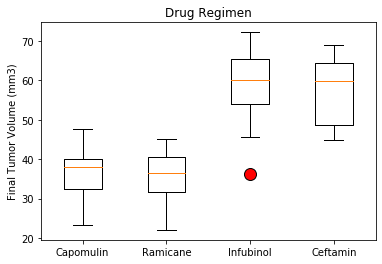

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
red_circle = dict(markerfacecolor="red", marker="o", markersize=12)
ax1.boxplot(tumor_vol_list, flierprops=red_circle,labels=treatments)
plt.show()

## Line and Scatter Plots

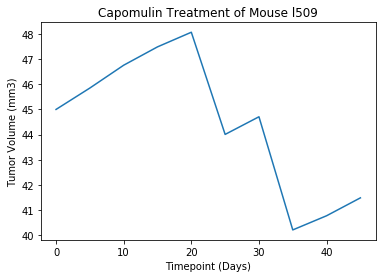

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509 = clean_df.loc[clean_df['Mouse ID']== 'l509']

plt.plot(l509["Timepoint"], l509["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

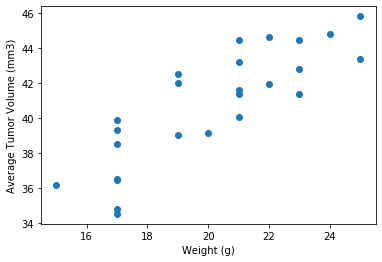

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df.loc[clean_df["Drug Regimen"]=='Capomulin',:]
capomulin_data = capomulin_data.groupby(["Mouse ID"]).agg({"Weight (g)":"mean","Tumor Volume (mm3)":"mean"})
plt.scatter(capomulin_data["Weight (g)"],capomulin_data["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.84


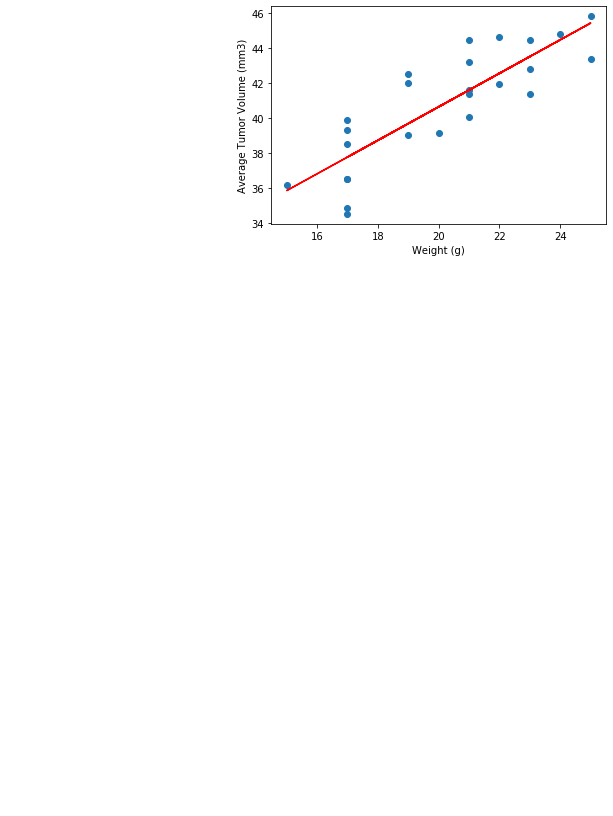

In [18]:
# Calculate the correlation coefficient and a linear regression model 
print(f'Correlation Coefficient: {round(st.pearsonr(capomulin_data["Weight (g)"],capomulin_data["Tumor Volume (mm3)"])[0],2)}')
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
y_values = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
x_values = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()